# Outline
- Importing the Libraries and Dataset
- Preprocessing the Data
    - Feature Engineering
- Visualization for Outlier Detection
- Outlier Removal
- Model Building
    - Linear Regression
    - Cross fold method
    - Grid Search CV
    - Decision Tree Regressor
- Python `PICKLE` File creaton
- `JSON` file creation

In [34]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [35]:
df1 = pd.read_csv('dataset.csv')
df1.head()

,Unnamed: 0,Price,Area,Location,No. of Bedrooms,New/Resale,Gymnasium,Lift Available,Car Parking,Maintenance Staff,24x7 Security,Children,Clubhouse,Intercom,Landscaped Gardens,Indoor Games,Gas Connection,Jogging Track,Swimming Pool
0,0,4850000,720,Kharghar,1,0,0,1,1,1,1,0,0,0,0,0,0,0,0
1,1,4500000,600,Kharghar,1,0,1,1,1,1,1,0,1,0,0,0,0,1,1
2,2,6700000,650,Kharghar,1,0,1,1,1,1,1,1,1,1,0,0,0,1,1
3,3,4500000,650,Kharghar,1,0,0,1,1,1,1,0,0,1,1,0,0,0,0
4,4,5000000,665,Kharghar,1,0,0,1,1,1,1,0,0,1,1,0,0,0,0


In [36]:
df1.isnull().values.any()

False

In [37]:
df1.shape

(6347, 19)

In [38]:
df1.Area.unique()

array([ 720,  600,  650, ...,  250, 1162,  435], dtype=int64)

In [39]:
df1.Location.unique()

array(['Kharghar', 'Sector-13 Kharghar', 'Sector 18 Kharghar',
       'Sector 20 Kharghar', 'Sector 15 Kharghar', 'Dombivali',
       'Churchgate', 'Prabhadevi', 'Jogeshwari West', 'Kalyan East',
       'Malad East', 'Virar East', 'Virar', 'Malad West', 'Borivali East',
       'Mira Road East', 'Goregaon West', 'Kandivali West',
       'Borivali West', 'Kandivali East', 'Andheri East', 'Goregaon East',
       'Wadala', 'Ulwe', 'Dahisar', 'kandivali', 'Goregaon',
       'Bhandup West', 'thakur village kandivali east', 'Santacruz West',
       'Kanjurmarg', 'I C Colony', 'Dahisar W', 'Marol', 'Parel',
       'Lower Parel', 'Worli', 'Jogeshwari East', 'Chembur Shell Colony',
       'Central Avenue', 'Chembur East', 'Diamond Market Road', 'Mulund',
       'Nalasopara West', 'raheja vihar', 'Powai Lake', 'MHADA Colony 20',
       'Tolaram Colony', 'Taloja', 'Thane West', 'Vangani',
       'Sector 5 Ulwe', 'Sector12 New Panvel', 'Sector 17 Ulwe',
       'Sector9 Kamothe', 'Sector 19 Kharghar

In [40]:
location_details = df1['Location'].value_counts(ascending=False)
location_details

Kharghar             533
Thane West           418
Mira Road East       390
Ulwe                 319
Borivali West        176
                    ... 
worli sea face         1
Sea Face               1
Shiv Sagar Estate      1
Natakwala Lane         1
Padle Gaon             1
Name: Location, Length: 413, dtype: int64

In [41]:
location_details_less_than_10 = location_details[location_details <= 10]
len(location_details_less_than_10)

324

In [42]:
df1['location'] = df1.Location.apply(lambda x: 'other' if x in location_details_less_than_10 else x)
df1

,Unnamed: 0,Price,Area,Location,No. of Bedrooms,New/Resale,Gymnasium,Lift Available,Car Parking,Maintenance Staff,24x7 Security,Children,Clubhouse,Intercom,Landscaped Gardens,Indoor Games,Gas Connection,Jogging Track,Swimming Pool,location
0,0,4850000,720,Kharghar,1,0,0,1,1,1,1,0,0,0,0,0,0,0,0,Kharghar
1,1,4500000,600,Kharghar,1,0,1,1,1,1,1,0,1,0,0,0,0,1,1,Kharghar
2,2,6700000,650,Kharghar,1,0,1,1,1,1,1,1,1,1,0,0,0,1,1,Kharghar
3,3,4500000,650,Kharghar,1,0,0,1,1,1,1,0,0,1,1,0,0,0,0,Kharghar
4,4,5000000,665,Kharghar,1,0,0,1,1,1,1,0,0,1,1,0,0,0,0,Kharghar
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6342,6342,2485000,700,Shirgaon,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,other
6343,6343,14500000,900,Thane West,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Thane West
6344,6344,14500000,900,Thane West,2,0,0,1,0,0,0,0,0,1,0,0,1,0,0,Thane West
6345,6345,4100000,1380,Boisar,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Boisar


In [43]:
df2 = df1.drop(['Unnamed: 0', 'Location'], axis='columns')
df2

,Price,Area,No. of Bedrooms,New/Resale,Gymnasium,Lift Available,Car Parking,Maintenance Staff,24x7 Security,Children,Clubhouse,Intercom,Landscaped Gardens,Indoor Games,Gas Connection,Jogging Track,Swimming Pool,location
0,4850000,720,1,0,0,1,1,1,1,0,0,0,0,0,0,0,0,Kharghar
1,4500000,600,1,0,1,1,1,1,1,0,1,0,0,0,0,1,1,Kharghar
2,6700000,650,1,0,1,1,1,1,1,1,1,1,0,0,0,1,1,Kharghar
3,4500000,650,1,0,0,1,1,1,1,0,0,1,1,0,0,0,0,Kharghar
4,5000000,665,1,0,0,1,1,1,1,0,0,1,1,0,0,0,0,Kharghar
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6342,2485000,700,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,other
6343,14500000,900,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Thane West
6344,14500000,900,2,0,0,1,0,0,0,0,0,1,0,0,1,0,0,Thane West
6345,4100000,1380,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Boisar


In [44]:
df3 = df2[~(df2.location == 'other')]
df3

,Price,Area,No. of Bedrooms,New/Resale,Gymnasium,Lift Available,Car Parking,Maintenance Staff,24x7 Security,Children,Clubhouse,Intercom,Landscaped Gardens,Indoor Games,Gas Connection,Jogging Track,Swimming Pool,location
0,4850000,720,1,0,0,1,1,1,1,0,0,0,0,0,0,0,0,Kharghar
1,4500000,600,1,0,1,1,1,1,1,0,1,0,0,0,0,1,1,Kharghar
2,6700000,650,1,0,1,1,1,1,1,1,1,1,0,0,0,1,1,Kharghar
3,4500000,650,1,0,0,1,1,1,1,0,0,1,1,0,0,0,0,Kharghar
4,5000000,665,1,0,0,1,1,1,1,0,0,1,1,0,0,0,0,Kharghar
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6341,7000000,1020,2,1,1,1,0,0,0,1,1,1,0,0,1,0,0,Mira Road East
6343,14500000,900,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Thane West
6344,14500000,900,2,0,0,1,0,0,0,0,0,1,0,0,1,0,0,Thane West
6345,4100000,1380,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Boisar


In [45]:
df4 = df3.drop(['Lift Available','Car Parking','Maintenance Staff','24x7 Security','Clubhouse','Intercom','Landscaped Gardens','Indoor Games','Gas Connection','Jogging Track', 'Swimming Pool', 'Children', 'New/Resale', 'Gymnasium'], axis='columns')
df4

,Price,Area,No. of Bedrooms,location
0,4850000,720,1,Kharghar
1,4500000,600,1,Kharghar
2,6700000,650,1,Kharghar
3,4500000,650,1,Kharghar
4,5000000,665,1,Kharghar
...,...,...,...,...
6341,7000000,1020,2,Mira Road East
6343,14500000,900,2,Thane West
6344,14500000,900,2,Thane West
6345,4100000,1380,3,Boisar


In [46]:
df4.shape

(5539, 4)

In [47]:
df4[df4['Area'] / df4['No. of Bedrooms'] < 300]

,Price,Area,No. of Bedrooms,location
239,11200000,573,2,Ulwe
503,4000000,568,2,Bhiwandi
545,6600000,550,2,Thane
546,6900000,565,2,Thane
547,6800000,547,2,Thane
...,...,...,...,...
6148,9700000,645,3,Mira Road East
6184,25800000,890,3,Borivali East
6186,13000000,500,2,Borivali West
6212,4800000,250,1,Andheri East


In [48]:
df5 = df4.copy()
df5 = df4[~(df4['Area'] / df4['No. of Bedrooms'] < 300)]
df5

,Price,Area,No. of Bedrooms,location
0,4850000,720,1,Kharghar
1,4500000,600,1,Kharghar
2,6700000,650,1,Kharghar
3,4500000,650,1,Kharghar
4,5000000,665,1,Kharghar
...,...,...,...,...
6341,7000000,1020,2,Mira Road East
6343,14500000,900,2,Thane West
6344,14500000,900,2,Thane West
6345,4100000,1380,3,Boisar


In [49]:
df5['price_per_squ_area'] = df5['Price'] / df5['Area']
df5
df6 = df5

C:\Users\VETLA PAVAN KALYAN\AppData\Local\Temp\ipykernel_3804\1661505327.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5['price_per_squ_area'] = df5['Price'] / df5['Area']


In [50]:
df5.shape

(5386, 5)

In [51]:
df6['price_per_squ_area'].describe()

count      5386.000000
mean      13133.176305
std        8931.795952
min        1597.444089
25%        7107.200423
50%       10088.523306
75%       16818.181818
max      109950.522265
Name: price_per_squ_area, dtype: float64

In [52]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, data in df.groupby('location'):
        m = np.mean(data.price_per_squ_area)
        st = np.std(data.price_per_squ_area)
        st_df = data[(data.price_per_squ_area > (m - st)) & (data.price_per_squ_area <= (m + st))]
        df_out = pd.concat([df_out, st_df], ignore_index=True)
    return df_out

In [53]:
df7 = remove_pps_outliers(df6)
df7

,Price,Area,No. of Bedrooms,location,price_per_squ_area
0,14900000,1245,2,Airoli,11967.871486
1,14000000,1183,2,Airoli,11834.319527
2,14800000,1245,2,Airoli,11887.550201
3,11100000,1050,2,Airoli,10571.428571
4,7500000,600,1,Airoli,12500.000000
...,...,...,...,...,...
4102,2116000,630,1,mumbai,3358.730159
4103,6000000,2700,4,mumbai,2222.222222
4104,10800000,653,1,mumbai,16539.050536
4105,4500000,653,1,mumbai,6891.271057


In [54]:
df7.rename(columns={'No. of Bedrooms': 'bhk','price_per_squ_area': 'pps'}, inplace=True)

In [55]:
df7

,Price,Area,bhk,location,pps
0,14900000,1245,2,Airoli,11967.871486
1,14000000,1183,2,Airoli,11834.319527
2,14800000,1245,2,Airoli,11887.550201
3,11100000,1050,2,Airoli,10571.428571
4,7500000,600,1,Airoli,12500.000000
...,...,...,...,...,...
4102,2116000,630,1,mumbai,3358.730159
4103,6000000,2700,4,mumbai,2222.222222
4104,10800000,653,1,mumbai,16539.050536
4105,4500000,653,1,mumbai,6891.271057


In [56]:
df7.bhk.unique()

array([2, 1, 3, 4, 6, 5], dtype=int64)

Text(0, 0.5, 'Count')

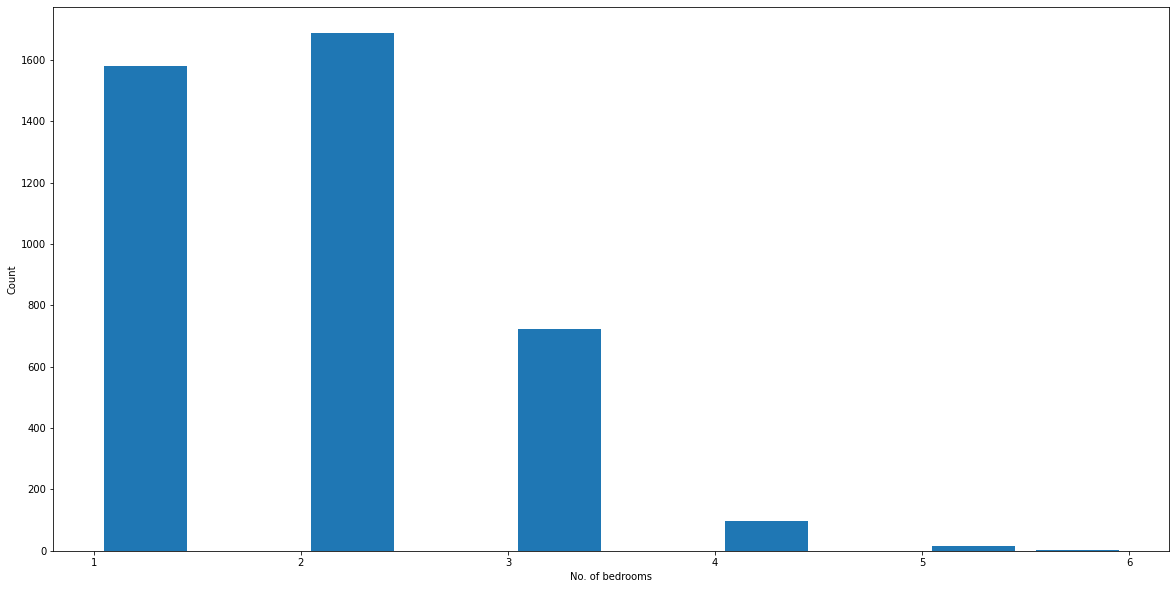

In [57]:
matplotlib.rcParams['figure.figsize'] = (20, 10)
plt.hist(df7.bhk, rwidth=0.8)
plt.xlabel('No. of bedrooms')
plt.ylabel('Count')

In [58]:
def remove_area_outliers(df):
    df_out = pd.DataFrame()
    for key, data in df.groupby('location'):
        m = np.mean(data.Area)
        st = np.std(data.Area)
        st_df = data[(data.Area > (m - st)) & (data.Area <= (m + st))]
        df_out = pd.concat([df_out, st_df], ignore_index=True)
    return df_out

In [59]:
df8 = remove_area_outliers(df7)
df8

,Price,Area,bhk,location,pps
0,7500000,600,1,Airoli,12500.000000
1,7500000,600,1,Airoli,12500.000000
2,7600000,650,1,Airoli,11692.307692
3,6500000,650,1,Airoli,10000.000000
4,9500000,780,1,Airoli,12179.487179
...,...,...,...,...,...
3109,2021000,600,1,mumbai,3368.333333
3110,2116000,630,1,mumbai,3358.730159
3111,10800000,653,1,mumbai,16539.050536
3112,4500000,653,1,mumbai,6891.271057


In [60]:
df9 = df8.drop('pps', axis='columns')
df9

,Price,Area,bhk,location
0,7500000,600,1,Airoli
1,7500000,600,1,Airoli
2,7600000,650,1,Airoli
3,6500000,650,1,Airoli
4,9500000,780,1,Airoli
...,...,...,...,...
3109,2021000,600,1,mumbai
3110,2116000,630,1,mumbai
3111,10800000,653,1,mumbai
3112,4500000,653,1,mumbai


In [61]:
dummies = pd.get_dummies(df9.location)
dummies

,Airoli,Ambernath East,Ambernath West,Andheri,Andheri East,Andheri West,Badlapur East,Bandra East,Bandra West,Belapur,...,Vashi,Ville Parle East,Virar,Virar East,Virar West,Wadala,Wadala East Wadala,Worli,matunga east,mumbai
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3109,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3110,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3111,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3112,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [62]:
df10 = pd.concat([df9, dummies], axis='columns')
df10

,Price,Area,bhk,location,Airoli,Ambernath East,Ambernath West,Andheri,Andheri East,Andheri West,...,Vashi,Ville Parle East,Virar,Virar East,Virar West,Wadala,Wadala East Wadala,Worli,matunga east,mumbai
0,7500000,600,1,Airoli,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7500000,600,1,Airoli,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,7600000,650,1,Airoli,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,6500000,650,1,Airoli,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9500000,780,1,Airoli,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3109,2021000,600,1,mumbai,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3110,2116000,630,1,mumbai,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3111,10800000,653,1,mumbai,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3112,4500000,653,1,mumbai,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [63]:
df11 = df10.drop('location', axis='columns')
df11

,Price,Area,bhk,Airoli,Ambernath East,Ambernath West,Andheri,Andheri East,Andheri West,Badlapur East,...,Vashi,Ville Parle East,Virar,Virar East,Virar West,Wadala,Wadala East Wadala,Worli,matunga east,mumbai
0,7500000,600,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7500000,600,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,7600000,650,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,6500000,650,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9500000,780,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3109,2021000,600,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3110,2116000,630,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3111,10800000,653,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3112,4500000,653,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [64]:
df11.shape

(3114, 92)

In [65]:
X = df11.drop('Price', axis='columns')
X

,Area,bhk,Airoli,Ambernath East,Ambernath West,Andheri,Andheri East,Andheri West,Badlapur East,Bandra East,...,Vashi,Ville Parle East,Virar,Virar East,Virar West,Wadala,Wadala East Wadala,Worli,matunga east,mumbai
0,600,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,600,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,650,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,650,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,780,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3109,600,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3110,630,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3111,653,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3112,653,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [66]:
y = df11.Price
y

0        7500000
1        7500000
2        7600000
3        6500000
4        9500000
          ...   
3109     2021000
3110     2116000
3111    10800000
3112     4500000
3113    11000000
Name: Price, Length: 3114, dtype: int64

In [67]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [68]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, y_train)
regressor.score(X_test, y_test)

0.9187850748804935

In [69]:
from sklearn.model_selection import ShuffleSplit, cross_val_score

cv = ShuffleSplit(test_size=0.2, random_state=0, n_splits=5)
cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.91563945, 0.91036121, 0.91344389, 0.91039331, 0.90608663])

In [70]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor


def find_best_model_using_gridsearchcv(X, y):
    algos = {
        'linear_regression': {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1, 2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion': ['mse', 'friedman_mse'],
                'splitter': ['best', 'random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X, y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])


find_best_model_using_gridsearchcv(X, y)

C:\Users\Public\Python\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
C:\Users\Public\Python\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = mak

,model,best_score,best_params
0,linear_regression,0.911281,{'normalize': True}
1,lasso,0.911185,"{'alpha': 2, 'selection': 'random'}"
2,decision_tree,0.912601,"{'criterion': 'friedman_mse', 'splitter': 'ran..."


In [71]:
dtree = DecisionTreeRegressor(criterion='friedman_mse', splitter='random')

In [72]:
dtree.fit(X_train, y_train)
dtree.score(X_test, y_test)

0.9366449557761141

In [73]:
from sklearn.model_selection import ShuffleSplit, cross_val_score

cv = ShuffleSplit(test_size=0.2, random_state=0, n_splits=5)
cross_val_score(dtree, X, y, cv=cv)

array([0.92486557, 0.88432078, 0.92569097, 0.93916312, 0.88669873])

In [74]:
import pickle
with open('mumbai_price_prediction_model.pickle', 'wb') as f:
    pickle.dump(dtree, f)

In [75]:
import json

columns = {
    'data_columns': [col.lower() for col in X.columns]
}
with open('columns.json', 'w') as f:
    f.write(json.dumps(columns))